In [1]:
%matplotlib inline
import re
import getpass
import gmaps
import requests
from bs4 import BeautifulSoup
from bs4 import SoupStrainer
from urllib.parse import urljoin
from IPython.display import clear_output, display
from parse import parse
import yaml
import time
import os
import sys
import pandas as pd
import xarray as xr
from shapely.wkb import loads
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry.point import Point
from shapely.ops import cascaded_union
import numpy as np
import matplotlib.pyplot as plt

import psycopg2
import json
from fabric2 import Connection

#adding prognos tools
sys.path.insert(0, "../../PROGNOS/")
from prognos_tools.encrypt import decryptString
from prognos_tools.Basin_fabric2 import Basin


storageToken=b'gAAAAABdiMKRN9CAWkwJjaORtRqmHmoAqR8j02XBp5PA18aPsIGdyMDAXN-pTYBjNAr0AaoZ6-kO2kS5x4fbFJFOZhk298W518PEhgQNIkot-dkCJfgk369_AEHoOtqUd84hnrpO5v1a58mu9VGA74KwEpEk3mDEdkZVPffPgK1y5B8Gp_s9_iqvPKP8EC4M-i1CVIhRIOVGEK4udkY-BYP-B20tYHarrbAigGwxeFxfpnSBQKUOtu4poU0GuJT0CLY7VUhqFb-0qTWQBmWqRg1e98_uMedZbGPjNKx1RAg7Z43-yb3M3OSFcaniRtXvzS5ScmVbsRuEWU2bR2hn2HWZY6m5oZdQPBWCoAknelAu7F3nMH3o-hGUciVDVaRGwGiD2qauyoPcbP0oP9kvjwSsysyFsomiRpewpaAkr2O85i0mXvehvGMMDZAKVFrCwJbXHR598ccCOp28Jo2-N91vadryW_-isdXF4vxKrlPwNDTqvy3m9WoxoeS98X5Z8U1cfbjVpy-UAzB16IzkivdkeOAteM_J6lZq2H5pnbG1TeF_f2kd3ul1FKV9xZGVxaBvT0G-YxjHM6HpYQn9O8rC_DfJUunoFToZp3VvG6hcTKjOl2inbaqqhcQ4RhavCymFFkR1FeMQ_2scNJcpiGUkI3GPGV7ujPlSpXVMkEViitT89thIIwsFL0IWvctJE35j42HArPhcEvvYWKBypt2Ok1jnVTNx7Vp4dE7V5HuXvkg65tjeHu2EFBVaIomhTdnqa2dUZ0Rj4F09J8s7NWA965V__LIp-30pSJaLKwAoRVs3DrkF11aV5EURNZyryXi6YwrLPCV5TodKvCmbCS-t1EVDpd50MX4KJErtuTAESvOQZTdFPMF0lR7ivMmc39luDOtSHupg0IiOqVaUVpw7GEF0FX4o4RZ61D4dx2xQ6nDBm0nyxOphGzkbHIGZmj9AnxTqVMDxfrFz9Edr2FBL4i3tORtIdGS_iDbiJvXm3fl1oYqe3bNqt_U-PKzlP9AXpsEkxyDPr6cNBqOE5coSFh9w1rJXfcdyQPt1p-57JydFQJmx2KvRmeYzXuruI1etqDF9eUzVVzC2GZfA__39-JFZMUDtNGsAwywbV6VB-xaNSi85wy7rjIitnWvo5tjqo1H8Hr-OFhrgvfKiXpWEF1_lBNIWqAnmPME8s-5CXIphMqKndp2ShMERviQX8C5aUosx3aIbnUboaUjxlIjiwCb1oXM_1_SRdoMmhKY87DibiRBJF_z1ouKmPnlUg-SAKYqh307Wd839PhlnxN8srVv8TdP7TkGlHZ_SoX6luloHB33Ejjuak0b0jG6o4yfyYgXHDDVkNRE7myeMhH4PKNqbLnG1USHxxsbT63h5R3LDwpU1MzjaGfEL3Mf86mTH6gsapWbImhtqlE1Orjq8Igx0O7tILowUBjmdBXcQw5Q4rhwe2ik-e18HnLycqCbq1ATcf2ldBmjpawzXUNVvZgqMq57eTraKgdM338gRT62Y2rVBZeFTURp-IIdN5NoWxBGnzFwyYPdq9aVXKtue9cDgeTHh3oP6lI9edu-baeGHi0bMzqPZppuht0-gZ1vVnEjapoMfj6hiqlfWUyG7Y4RqjQGabzAYxam0BhDXpSfvvoQCat02IyUG93d4gQQEjsyPQuVxV5pgKNA9YO99TqnKac2Xkr-zlqQyFe4J2NzkqDb-XSQXjOv2zkXaUZdFp54KnAb1iuc_tOgHZwpeMb_AkG9K_ACX2x7arG5slhNlUu-UXfLL5K9GdGXGQYJllyW3HTfi3ZjJthHn16fjMoxmzJU-qzqoKTT8HuU3sY9LLzKQJmlhpE915RDOsSlI6-znbTrqfGz_bm2putOb38HrH5i7ptR-ofCtblFa_jpYTx2R_A-2LSIokfOknXY7WPGciDY7YUzC_mz0SJYtNfQxF4ny6hKHVVh2Rt2XeP6-NsIqUaYrEDiFTz-kvXMA9MUQ70_z67oKr8dp8PK-kSPE_wdnjS1cUFVB1hhTm8HNsKqDNNB5byk7QN0GuTYXNk0hxKJK3i32UMclD8lLAP8Pa_nY4J47q84f3XSkNxJ571Lnr7RXSV88u3T6qnXWv0ciG4PAxXVwD_X2qpEY8-SyQqny2Yxw7xPbdwa7h6DrzXlzrk2pvI9KhEGuLtWMxiPOxiitDg0FEFJSHbfXZHKtqtFemav19nNrcBN-VbGLCt_bBVV4uuMs3W7nv-Y7MKFpKzQVdqYHbgbtSE3rgXQyLL_OirmxaBJz-DQXdystdR4epjtd1LNN8VXwnRv5Ln6siPPCy-QPp-ITKWe-ACsS3t3gIxTjgMpTVBbYp40OHfMwhk2iHDTA-DFlrilepwH8TWZG4LVl5fwHmv_rTpb_K01kv2_wAHZjCsNCtfTMiNjZTYepp3w_MbTG1KnV21L7UCi8ktj55W4vu4sh8REqiGfYDFhPJ444dae_-Wg_UdBwVrJtRWlPUW_m8V4kOgusQSgHPZCXR_SLAxWvbxd1MkzcXbIaCTj2hsseQFx3kUmNDj911E7rV1RbLRzaIFx6Weffy0U8mvrBh8kfZuHk8hAksdD-Ke4JC25ucn36y8MjGkV_bWf-h6I-2eijxg7da-3-R6EtPp8goTIkiFTO8IK84PEFnODhBvdGTYR81zMBmaYWnD3Ir0LZE4dGVc9jFYk22fZJ56httDKR130AsZ1B-nqlsfn-n9plJKoKWVjYLnfAI2TgOCndQCJ2fxkbjfS0x7eKCysUEijLX8vAqhwHCZOasikFlMGxmlHF-Ph_WunExoWhoxlvzP6FDny-0poTkllSRt9KN6rHn5rzqzxS-fSxW6GLnSn8Y7TsGpy0tn_KMRsGV5xbDJWFFMnvMf7hB1L9_Ut9fvzsX3Iz-O1ktqWnNQwBKi-MsFePpIXtKA4U8KQrWBf6TyASoqw79xVdlqbXwzYfg9Ur_kYh7nHXYKwP4oy2agTdYRzUydWi819NmgW_QFp72aUMGAKCxy5MpxJMDR_41OkQxyjuPHT_3HskCFjdcvUOgp0Hi8m-iU5D34PaVeGisC2H-rbyaS_ET3PtJ0kU1Xx3oF2xYM1q-4QB9qBxUyDdk5hBNxaoAslA8sE_Y1JfMzfyjIqK4OR5_noBkksj_f7tlezivS8eKmhClnSGboQVS5ypcEw5n8d-XQh8C58qKmQ2jUZOYyt6WBAD-TfzyqPxDX423z-Cuw=='
computeToken=b'gAAAAABdiMIg9OCnTJ3gsI_ZGqzRz2jbkLvVHtvw8stG7ljodd08gXOQFYuiclCtsPkSLgwvMiuro1QZw_8Y8txjIPBVOI313SGpfNj5UtfG1jZbNeMDMHJXz3w_be3a6JjsLJtXSmFNYrTKUJKioomQuugq0dI8oIgqQ5MrAx8hOheG1BB0lxW20UzE5W2izjXLqGhtBGQJVrvvt7j1-GFcDu-FvSEik4JQQK9miOJlfNfPUhY5wagCcC_FLmdc_9vmBVo7xprhGkQjFmO_EbQJVkNIteE0QWt77x2zPkuOowyMxfDAP9KyOte2q5vrrX27InZ4OXNdoAP56kFYJ0dvqiq7vkPK2cliroFo3fDgm-SyPxZx4S37ga8aOanpESKpKZke7ea-EQoAOQqGGk9OA8tVDa2kJNvZEoZLa0xPI1rBiMPna3PWHoinfO0C3ohuDYIUPYKWNrymNmrNvdtkUMD9COvAWGP-wEZ7S7iZN9NlBJ_uUmFVpTNGVwBrGCebxW3byN5CSxQ7zKHuvlWI0-sggUph58lTYq1FThwZ2YM0hPDmO4Wvlefneyf3OYAURfAjU4Z9v8SZc2EUgb8jHLscTwY1hQWdVFDEgxFJ2vLOXX3yvfPfzNw0Fz9OlU2hwLqyZNYE7XoZaC2A2ndl9OjsKalqeyAmUoyRx-EN1IAMt-cvMwCXCiCzKgu1tmObye_evqcW2KRZ2hgvUBXWX_gtqDLa9RumxnKw9mw8aTfqoCumK74Vr9c4L6csJOkJyoZCDeKyfvMRgIPnFR4GThTZjdBRE4jMFnPV5I_pjcfNSX8gEXoKuH7pcWSMmSUZ2-IPTZeJVBT4yFpamKuYhao67ZVOCeIg0RTwnywuQZK3VGNqL0c27z_L_Y7uW-T0MV-Z8wv0hxqOT5JQ_xl_OIVGCUitQRnrN_ZIECIr6lpdhYk8HH73yOGKGtR6lMFK7ww99z4fWFl5X0opYrbMpI5dJ8kxB7u85escismPL2FFvib4s69hzBPAdXVaos2j1aquixf3pYIOOtnQE1_H0-JHZnmtfg4SBIUvyFVeWpxgBfcgvS-3YiUJLf5BU9hiSYLMMzIJbQspKz_qh3rrcYwvYEyUffrqD2p-62D95YqL4SNtO0l9nnzCZ909b1sddEoF1W_qjxNFc92G3B0tqC8vgEp_3Ec1b3A8fPAmSHV1MEXfEhPLha_OUiKLA8tGCN9lA5kee4712SSO6C0ImImZt-UB2RnzKveqtUI6Id1qM4Evs_lDKiaIWl8kDL-dXROiTWsLbHY454n0RRmUYLnB2UXlVwUZwN8r12rbbTlQ8u6G-Zwujnb8Nex9PpdCQ2gV72-860TNWxPQHNUvOCbXKK3ZnolEPd_mtx0gXNO3N99nNc2G4h9Ro1zWHP8w2UWnBEYPLluqqCNc71w5Xw4rQeNlXSy9-UixdZzV-5JGXggj0cMMgC9dpdj_lagShtms5REijpEOMguhuSTLmYNNNXsPD7Lp7yz7qFCvdtQuIHYoqZXvuHEH3mbBr56C2eQ-m_VPVnO0zkB-1aWgRDm20g0xsxUH2oheVo85hSw_H7-lZNhMoBvn6M_owIrfo9ntm7k4DGWHqVdzHXL30S2QarUvR1r7oq4E4SJKhgsZp4OphXJs6mzSNCUWEabcsKwx9wSXJex1PuWypIASji5sweL97kSWxz-7K26DUx73C7jFzDhKk4zwTm5bj08qc1juN7KJl6xKMdeRMb-qI7jeL_W8lqqscKRXCmzGsDuYwpq5zP3z76C2-YCVMZS5fuI299AwPkzhG5aYc-2yaRaHW-dIDnwdzHdGnC5EL1MH6SUdeCw1vhdbD42gEKOc-FJGZdsFdbVKN4iHKiP7Ewp5RcxOmZEnXOVFDz2mDj_oXJXuuxj7EpGhSltGo58CpqDp9PXMqSqZ25mRB2ZUNHyKQxDtiItdnZzfXRbe0l_2oWrDdygvPbaUiV7pNf9V_owZpAKw0pEN_mQ0TbKbPDs-0RkImfLHUN8en26XDtUSVMlyH_coyAzTYpxpzhOclcTCq-qt9BmWPUd95ns4Qst5JLHXE5eA4aaFqAgKxyFtDIBb3G_cfCF4yjYxzmC3g7HgU0mQXAzzJ3-f8GYJeaVNLzKSnhx_lEDgvzhokc3dAiL6wyxqPgkYq6VvjqGqA1s85673gbKXB2wtfCKjaU2HcYZxPooX9JSWLUJ7dmwJm7CPUzLUPNu3jrk0LUJVe9MAugiKAgOj823uT-TiS4vu3M25uEs2Z8wJ38G-_8T24AYQkAUQuBTsVMssDIW8p_Yz2SWPwaJN9rzNIA_CI0JI0k60kWOmdNEPqjdcxAZgmCUBjanjhc8gxlMtVxbOSqewi95hNuuyd7gXKiRKvb4sMpqXviKe3HKFqdRvmfFBaWYKymLOx0-bxhwZkwjpZeKlh3oK4QCXbMedJ1pPOHY4nCfh4_TSbIKQPlC68ItsmsRENaiffwXz0mEQbYVCkWZ_gYnSER9Lc5P4-GBE3nQtxLEHOQQra0d5g0TLMDx0WjRv1M8hGZ8zUBHILuab_Y0jOURKYtJJLNIyHhH0qdFktk_0CoJplzL1Vu03ZUYGIS7zoEAFio9-MTGZ-zBuPow7flAS0V3VnSxRDlgY8Fn_Uc044EMlQ0Oszz8vIpUtAf9oAWpvu-wmtYrU2I2mrLUyxf2doG0O5lMwhEC7WKBaI4YYzwSt5NTaAZFVy-pe6hq4f0NBlvB083Gi5-eT_s9qOsagf2Rd9ssV9aZY4QNuqobTZTIOFqytZrraRfGAClGyppZlLrIlkOexIJBGEcwObYLhdPipdazozE4FRLjhDrAFqutE8yHeR_irOJ-20x8AYxp3q4xjR0D5xeyVy6RgWm8hhhEoPEX9XZkFrwho1J_TOuEAWCDy6D2pdK1DEcJmEE8MEUVKGJn4q6Rtn8uHSN8iz5dzwqifQFlgRDQahWUwOJhvQ1PgQSegeR2-bjRkWix2ap8CMFXcJAOwE01WggE8PSYhP9JKrSUsJPEJVOPwImWnvUhoQfsi6u4TeMqAvwOy87Z1NKIBleHAky1YwICJSnMmRPGHoB-Xfq32p3nG5XlHCsB1jr7FRifGqKoyA22hSHspqA7ZpwwitDLw3lzJ0HfZsuG91e2rAx2I5h0khw=='
gmapsToken=b'gAAAAABctxJp5wE73qK6U5VieCi0WXNnNex4KxLZHutsESa8fW9v43lLa1Ag0qsxKFjXXo9MBAdvUpqJPW-QmCE0gH_Opf9g4xAG1VaI2WarO_xDZg44VLMCHkd_6O8ofgp8u4VuFBMr'
key = getpass.getpass('Password: ')
apiKey = decryptString(gmapsToken,key)
computeKey =  json.loads(decryptString(computeToken,key))
storageKey =  json.loads(decryptString(storageToken,key))
with open('compute.json','w') as f:
    json.dump(computeKey,f)
with open('storage.json','w') as f:
    json.dump(storageKey,f)
gmaps.configure(api_key=apiKey)
del key,apiKey,computeKey,storageKey

#Creating folder to store temporary files and downloaded data
saveFolder = './DownloadedData/'

args = [saveFolder,]
!!rm -rf {args[0]} && mkdir -p {args[0]}

Password:  ·······


[]

## Querying extent of the basin
### Creating a VM with the geodatabase on it

In [2]:
#Testing connection to google cloud
cloudInfo = {'project': 'nivacatchment',
             'zone': 'europe-west3-a',
             'instanceType' : "n1-standard-2",
             'instanceName' : "basin",
             'username' : "jose-luis",
             'keyDir' : './'
             }
basin=Basin('compute.json',cloudInfo,'storage.json')
display(basin.properties)

info = basin.get('projectInfo')
display('Can now talk to project {}'.format(info['name']))


#Setting ssh firewall for project
inOffice = False
if not inOffice:    
    with Connection('localhost') as c:
        hubIp = c.local('curl https://ipinfo.io/ip').stdout.strip()
        basin.setSSHPort(hubIp,inOffice=False)
        basin.setPostgresAccess(hubIp,inOffice=False)
else:
    basin.setSSHPort()
    basin.setPosgresAccess()

#Actually instantiating the machine
ip=basin.instantiate(wait=True) #wait until the vm is actually up and running
display(ip)

#Allowing local connections on the VM without password by modifying the pg_hba.conf file
with Connection(host=basin.properties['ip'],
                user=basin.properties['username'],
                connect_kwargs={"key_filename": basin.properties['keyFile'],}
                ) as c:
    #c.sudo('''find /etc -name pg_hba.conf -exec sed -i 's|\(^host \+all \+all \+::1/128 \+\).*|\\1trust|g' {} \; ''') #Trust all local connections
    #c.sudo('''find /etc -name pg_hba.conf -exec sed -i 's|\(^host \+all \+all \+127.0.0.1/32 \+\).*|\\1trust|g' {} \; ''') #Trust all local connections
    c.sudo('''sed -i '1,/# IPv4 remote .*/!d' /etc/postgresql/9.6/main/pg_hba.conf''') #Deleting all settings for ipv4 connections
    c.sudo('''echo "host    all    all    151.157.0.0/16   md5" | sudo tee -a /etc/postgresql/9.6/main/pg_hba.conf >/dev/null''') #Allowing connection from NIVA ip
    c.sudo('''echo "host    all    all    {}/32    trust" | sudo tee -a /etc/postgresql/9.6/main/pg_hba.conf >/dev/null'''.format(hubIp)) #Allowing connection form hub ip
    c.sudo("service postgresql restart")


#Defining custom queries to geodatabase. Note that we forwarded the port on the VM to the
#local 5432 port so as to be able to talk to postgresql through the local port
def query(query,fetch=True):
    db = psycopg2.connect(host=ip, port=5432, database='geonorway')
    cursor = db.cursor()
    cursor.execute(query)
    if fetch:
        result = cursor.fetchall()
        db.close()
        return result
    db.close()

['Oct 16 11:13:31 basin systemd[1]: Startup finished in 1.294s (kernel) + 2min 6.358s (userspace) = 2min 7.652s.']

'35.242.248.200'

### Getting basins extent

In [3]:
basin.setConnection()
schema = 'metno'
station =  'Vansjø'
stationsFile = '{}.yaml'.format(station)
stations = yaml.safe_load(open(stationsFile))
display(station)
#Actually processing the basin
geoResultsFolder='./geoResults'
basin.getBasinLayers(stationsFile,schema,saveFolder=geoResultsFolder)


sql = '''UPDATE metno.resultsshp AS a
SET basin = (SELECT ST_Union(b.basin)
FROM metno.resultsshp AS b
WHERE b.station_id = 0 OR b.station_id = 1)
WHERE a.station_id = 0;
DELETE FROM metno.resultsshp AS a WHERE a.station_id = 1;
ALTER TABLE metno.resultsshp
ADD COLUMN area DOUBLE PRECISION;
UPDATE metno.resultsshp
SET area = (ST_Area(basin));
'''

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')
# basinGenerator.kill()

'Vansjø'

'Directory should be created'

Gonna create the getBasin.sh file
./geoResults/getBasin.sh


NOTICE:  table "stations" does not exist, skipping


 initializestations 
--------------------
 
(1 row)

 addstations 
-------------
 
(1 row)



NOTICE:  drop cascades to 9 other objects
DETAIL:  drop cascades to table metno.stations
drop cascades to table metno.demrast
drop cascades to table metno.demshp
drop cascades to view metno.flow
drop cascades to view metno.elevation
drop cascades to table metno.resultsrast
drop cascades to table metno.resultsshp
drop cascades to table metno.databoundaries
drop cascades to table metno.areas


 initializeresultsschema 
-------------------------
 
(1 row)



NOTICE:  table "buffertable" does not exist, skipping


 createdatatable 
-----------------
 
(1 row)

 createresultstable 
--------------------
 
(1 row)

0
Initializing... 
Done (postgis major version: 2).
Output shape: Point
Dumping: X [1 rows].
Gage Watershed version 5.3.8
Input file PG:dbname=geonorway schema=metno table=flow column=rast where='station_id=0' mode=2 has projected coordinate system.


This run may take on the order of 2 minutes to complete.
This estimate is very approximate. 
Run time is highly uncertain as it depends on the complexity of the input data 
and speed and memory of the computer. This estimate is based on our testing on 
a dual quad core Dell Xeon E5405 2.0GHz PC with 16GB RAM.


Size: 2
Read time: 5.551139
Compute time: 2.566667
Write time: 1.411150
Total time: 9.528956
Creating output basin0.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.


Shapefile type: Polygon
Postgis type: POLYGON[2]


SET
SET


ERROR:  column not found in geometry_columns table
CONTEXT:  PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying,character varying) line 34 at RAISE
SQL statement "SELECT DropGeometryColumn('',$1,$2,$3)"
PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying) line 5 at SQL statement
NOTICE:  table "dummy" does not exist, skipping


DROP TABLE
BEGIN
CREATE TABLE
ALTER TABLE
                addgeometrycolumn                
-------------------------------------------------
 metno.dummy.geom SRID:3035 TYPE:POLYGON DIMS:2 
(1 row)

INSERT 0 1
INSERT 0 1
INSERT 0 1
COMMIT
ANALYZE
INSERT 0 1
1
Initializing... 
Done (postgis major version: 2).
Output shape: Point
Dumping: X [1 rows].
Gage Watershed version 5.3.8
Input file PG:dbname=geonorway schema=metno table=flow column=rast where='station_id=1' mode=2 has projected coordinate system.


This run may take on the order of 1 minutes to complete.
This estimate is very approximate. 
Run time is highly uncertain as it depends on the complexity of the input data 
and speed and memory of the computer. This estimate is based on our testing on 
a dual quad core Dell Xeon E5405 2.0GHz PC with 16GB RAM.


Size: 2
Read time: 1.817487
Compute time: 1.224597
Write time: 0.407275
Total time: 3.449360
Creating output basin1.shp of format ESRI Shapefile.
0...10...20...30...40...50...60...70...80...90...100 - done.


Shapefile type: Polygon
Postgis type: POLYGON[2]


SET
SET
          dropgeometrycolumn           
---------------------------------------
 metno.dummy.geom effectively removed.
(1 row)

DROP TABLE
BEGIN
CREATE TABLE
ALTER TABLE
                addgeometrycolumn                
-------------------------------------------------
 metno.dummy.geom SRID:3035 TYPE:POLYGON DIMS:2 
(1 row)

INSERT 0 1
INSERT 0 1
COMMIT
ANALYZE
INSERT 0 1
DROP TABLE
COPY 2
COPY 1
COPY 2
UPDATE 1
DELETE 1
ALTER TABLE
UPDATE 1


<Result cmd='rm sql.sql' exited=0>

In [4]:
# Adding user jovyan 
sql = '''CREATE ROLE jovyan WITH LOGIN;
GRANT USAGE ON SCHEMA metno TO jovyan;
GRANT SELECT ON ALL TABLES IN SCHEMA metno TO jovyan;
'''

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')

psql:sql.sql:1: ERROR:  role "jovyan" already exists


GRANT
GRANT


<Result cmd='rm sql.sql' exited=0>

### Displaying basins

In [5]:
a = query('''SELECT json_build_object('type', 'FeatureCollection',
                                      'features', json_agg(json_build_object(
                                                                'type',       'Feature',
                                                                'label',      station_name,
                                                                'geometry',   ST_AsGeoJSON(ST_ForceRHR(St_Transform(basin,4326)))::json,
                                                                'properties', jsonb_set(row_to_json(resultsShp)::jsonb,'{basin}','0',false)
                                                                )
                                                            )
                                     )
             FROM metno.resultsShp;''')

fig = gmaps.figure(map_type="TERRAIN")
fig.add_layer(gmaps.geojson_layer(a[0][0]))

b = query('''SELECT a.station_name, st_x(st_transform(a.outlet,4326)),
    st_y(st_transform(a.outlet,4326)), st_area(b.basin)/1e6
    FROM metno.demShp AS a
    INNER JOIN metno.resultsShp AS b 
    ON a.station_id = b.station_id''')

outlets = [{"name": i[0], "area": i[3]} for i in b]
locations = [(float(i[2]),float(i[1])) for i in b]
info_box_template = """
<dl>
<font color="black">
<dt>Name</dt><dd>{name}</dd>
<dt>Area</dt><dd>{area} km<sup>2</sup></dd>
</font>
</dl>
"""                                                
outlet_info = [info_box_template.format(**outlet) for outlet in outlets]                                                 
marker_layer = gmaps.marker_layer(locations, info_box_content=outlet_info)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

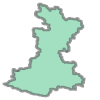

In [6]:
from shapely import wkb
a = query('select st_transform(basin,4326) from metno.resultsshp;')
basin_shapely = wkb.loads(a[0][0],hex=True)
display(basin_shapely)

# Getting data from metno thredds servers


## Creating cfg file for download

In [7]:
cfgTemplate='''[extract]
reduceToBoundingBox.south=59
reduceToBoundingBox.north=60
reduceToBoundingBox.west=10
reduceToBoundingBox.east=12
''' 

# cfgTemplate = '''[interpolate]
# method=bilinear
# latitudeValues=59.4392814052
# longitudeValues=10.7438771059
# '''

with open('extractamente.cfg','w') as f:
    f.write(cfgTemplate)
# 10.7438771059,  y= 59.4392814052

## Getting all variables for all basins using fimex

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


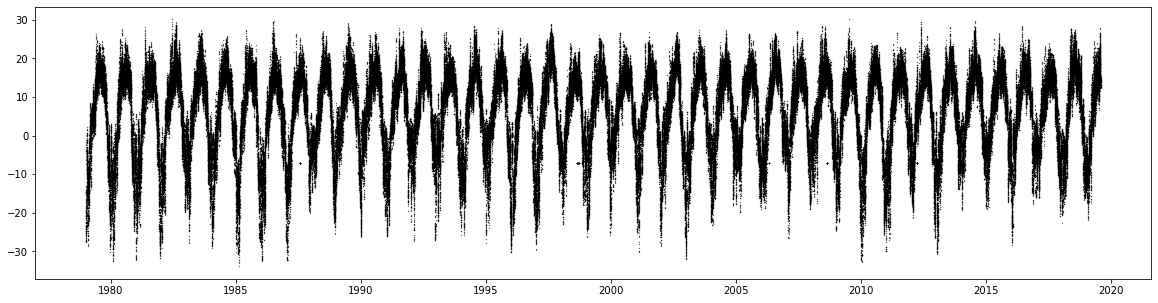

In [8]:
#Getting all boundaries to download:
weatherFile = os.path.abspath('vansjø_era.nc')
if not os.path.isfile(weatherFile):
    with Connection('localhost') as c:
        c.local("fimex-1.3 -c extractamente.cfg --input.file {} --output.file {}".format('norway.nc','vansjø_era.nc'),replace_env=False)


nc_data = xr.open_dataset(weatherFile,chunks={'time':1000})
temperature = nc_data.t2m - 272.15

time = nc_data.time
nc_shape = temperature.shape
nc_data.close()
plt.figure(num=None, figsize=(20, 5))
plt.plot(time,temperature[:,0,0],'k.',markersize=0.5)

## Intersecting basin and nc file 

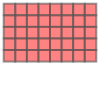

In [9]:
# Creating a grid from the nc file

temperatureFile = weatherFile #'./'/home/jose-luis/Downloads/hist_CNRM_CCLM_RR_daily_mm_1971.nc
nc_data = xr.open_dataset(temperatureFile)
#temperature = nc_data.precipitation__map_hist_daily
temperature = nc_data.t2m
nc_shape = temperature.shape
X = nc_data.longitude.values
Y = nc_data.latitude.values
nc_data.close()

#Y=Y[0]

cnt = 0
grid = list()
for i in X:
    for j in Y:
        left = i-0.125
        right = i+0.125
        bottom = j-0.125
        top = j+0.125
        p1 = Point(left,bottom)
        p2 = Point(left,top)
        p3 = Point(right,top)
        p4 = Point(right,bottom)
        pointList = [p1,p2,p3,p4,p1]
        poly = Polygon([[p.x,p.y] for p in pointList])
        poly.sid = cnt 
        grid.append(poly)
        cnt += 1

grid = MultiPolygon(grid)  
display(grid)


In [10]:
import geopandas as gp
from shapely.ops import cascaded_union,unary_union
basin_shapely = cascaded_union([basin_shapely])
gridi = cascaded_union(grid)
display(grid.intersection(basin_shapely))

ModuleNotFoundError: No module named 'geopandas'

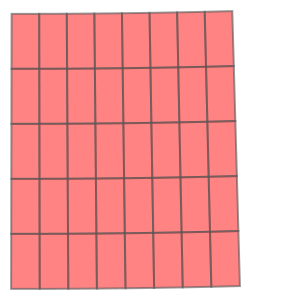

In [12]:
transform = True
if transform:
    import pyproj
    from shapely.ops import transform

    project = pyproj.Transformer.from_proj(
        pyproj.Proj(init='epsg:4326'), # source coordinate system
        pyproj.Proj(init='epsg:3035')) # destination coordinate system

    grid = transform(project.transform, grid) 
    display(grid)

In [13]:
# Uploading the grid to the geodatabase
sql = '''UPDATE metno.resultsshp SET basin = ST_MakeValid(basin); 
DROP TABLE IF EXISTS metno.dataBoundaries;
CREATE TABLE metno.dataBoundaries(sid SERIAL PRIMARY KEY, boundary geometry(MULTIPOLYGON, 3035) );
INSERT INTO metno.dataBoundaries(boundary) VALUES (ST_SetSRID('{hexStr}'::geometry,3035));
DROP INDEX IF EXISTS metno_data_boundary_gix;
CREATE INDEX metno_data_boundary_gix ON metno.dataBoundaries USING GIST(boundary);
DROP INDEX IF EXISTS metno_basins_gix;
CREATE INDEX metno_basins_gix ON metno.resultsShp USING GIST(basin);
'''.format(hexStr=grid.wkb_hex)

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')

UPDATE 1


psql:sql.sql:2: NOTICE:  table "databoundaries" does not exist, skipping


DROP TABLE
CREATE TABLE
INSERT 0 1


psql:sql.sql:5: NOTICE:  index "metno_data_boundary_gix" does not exist, skipping


DROP INDEX


psql:sql.sql:7: NOTICE:  index "metno_basins_gix" does not exist, skipping


CREATE INDEX
DROP INDEX
CREATE INDEX


<Result cmd='rm sql.sql' exited=0>

In [14]:
# Intersecting grid with basin and getting area of the intersection
sql = '''
DROP TABLE IF EXISTS test_dump;
CREATE TABLE test_dump AS
SELECT (ST_Dump(boundary)).path[1] as sid, (ST_Dump(boundary)).geom as geom
FROM metno.dataBoundaries;

CREATE INDEX dump_idx ON test_dump USING GIST(geom);

DROP TABLE IF EXISTS subdivided_geoms;
CREATE TABLE subdivided_geoms AS
SELECT ST_Subdivide(basin,32) AS geom
FROM metno.resultsShp
WHERE station_name ='{}';

CREATE INDEX subdivided_idx ON test_dump USING GIST(geom);

DROP TABLE IF EXISTS metno.areas;
CREATE TABLE metno.areas AS
WITH biglim AS (
    SELECT a.sid,ST_Area(ST_Intersection(b.geom, a.geom)) AS area FROM  test_dump AS a, subdivided_geoms AS b
    WHERE ST_Intersects(a.geom,b.geom)
) 
SELECT sid,SUM(area) as area FROM biglim
GROUP BY sid;

GRANT SELECT ON ALL TABLES IN SCHEMA metno TO jovyan;
'''.format(station)

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')

areas = query('SELECT * from metno.areas;')

DROP TABLE
SELECT 40
CREATE INDEX
DROP TABLE
SELECT 627
CREATE INDEX
DROP TABLE


psql:sql.sql:17: NOTICE:  table "areas" does not exist, skipping


SELECT 7
GRANT


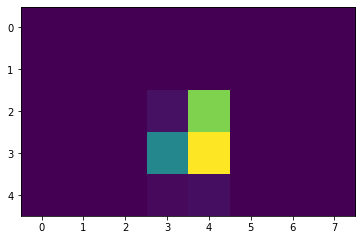

In [15]:
#Getting weight array from area file
#weights = pd.read_csv( os.path.join(geoResultsFolder,'areas.txt'),delimiter=';', header=None, names=['idx','area'])

idx = [i[0] for i in areas] #weights.idx.values
weight = [i[1] for i in areas] #weights.area.values
#Getting the in a 2d array
weightArray = np.zeros((nc_shape[1:]))
arrayIdx = np.unravel_index(idx,nc_shape[2:0:-1])
for i,j,k in zip(arrayIdx[1],arrayIdx[0],weight):
    weightArray[i][j] = k;

plt.imshow(weightArray)

In [16]:
np.savetxt('{}_weights.txt'.format(station),weightArray)

array(['1979-01-01T00:00:00.000000000', '1979-01-01T01:00:00.000000000',
       '1979-01-01T02:00:00.000000000', ...,
       '2019-07-31T21:00:00.000000000', '2019-07-31T22:00:00.000000000',
       '2019-07-31T23:00:00.000000000'], dtype='datetime64[ns]')

array(['1979-01-01T00:00:00.000000000', '1979-01-01T01:00:00.000000000',
       '1979-01-01T02:00:00.000000000', ...,
       '2019-07-31T21:00:00.000000000', '2019-07-31T22:00:00.000000000',
       '2019-07-31T23:00:00.000000000'], dtype='datetime64[ns]')

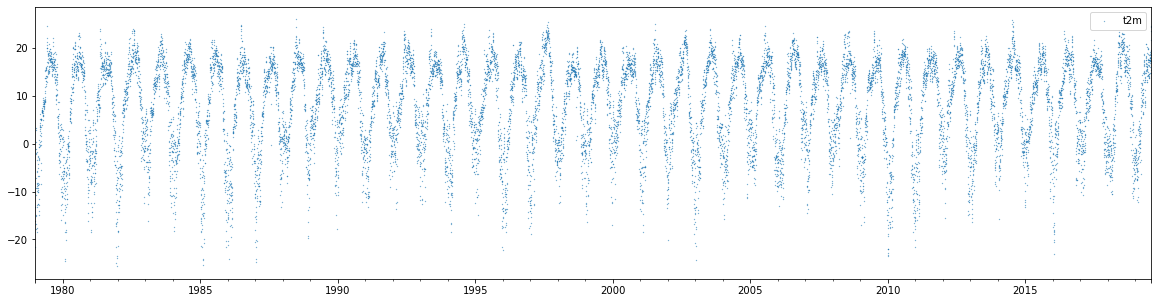

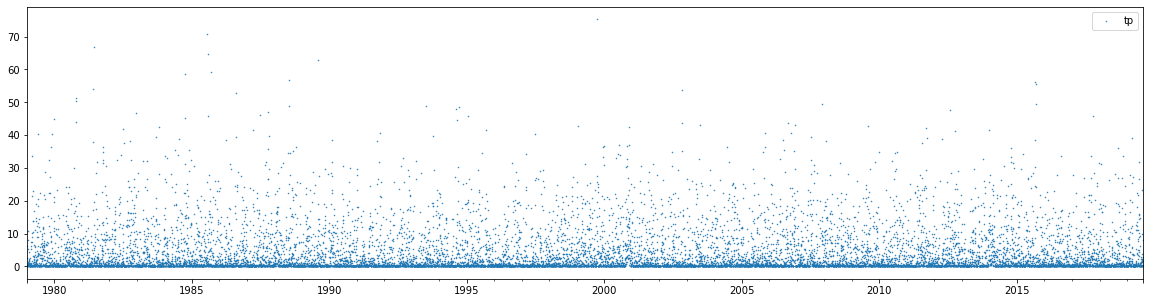

In [17]:
# Getting area-weighted data
import datetime

def getWeightedData(filename,variable,save=True,isTemperature=False):
    nc_data = xr.open_dataset(filename,chunks={'time':1000})
    time = nc_data.time.values
    display(time)
    total_weight = sum(weight)
    data = np.sum(np.sum((nc_data.variables[variable] * weightArray)/total_weight,axis=1),axis=1)
    if isTemperature:
        data-=272.15
    data_df = pd.DataFrame({variable:data},index=time)
    if save:
        data_df.to_pickle('./{}_era5.pickle'.format(variable))
        data_df.to_csv('./{}_era5.csv'.format(variable))
    nc_data.close()
    return data_df

def getInterpolatedData(filename,variable,save=True,isTemperature=False):
    nc_data = xr.open_dataset(filename,chunks={'time':1000})
    time = nc_data.time.values
    data = nc_data.variables[variable].values.flatten()
    if isTemperature:
        data-=272.15
    data_df = pd.DataFrame({variable:data},index=time)
    if save:
        data_df.to_pickle('./{}_era5.pickle'.format(variable))
        data_df.to_csv('./{}_era5.csv'.format(variable))
    nc_data.close()
    return data_df

temperature_df = getWeightedData(weatherFile,'t2m',save=False,isTemperature=True)
temperature_df.index = temperature_df.index + datetime.timedelta(hours=8)
temperature_df = temperature_df.resample('D').mean()
temperature_df.plot(figsize=(20,5), marker = '.', linestyle='None', markersize=0.5)
fig=plt.gcf()
fig.savefig('temperature_era5.png')

rain_df = getWeightedData(weatherFile,'tp',save=False)
rain_df.index = rain_df.index + datetime.timedelta(hours=8)
rain_df = rain_df.resample('D').sum()
rain_df = rain_df * 1000.0;
rain_df.loc[rain_df['tp'] > 100.0, 'tp'] = 0.0
rain_df.plot(figsize=(20,5), marker = '.', linestyle='None', markersize=1)
fig=plt.gcf()
fig.savefig('rain_era5.png')

rain_df.to_csv("{}_rain_era5.csv".format('Vansjø'))
temperature_df.to_csv("{}_temperature_era5.csv".format('Vansjø'))

array(['1979-01-01T00:00:00.000000000', '1979-01-01T01:00:00.000000000',
       '1979-01-01T02:00:00.000000000', ...,
       '2019-07-31T21:00:00.000000000', '2019-07-31T22:00:00.000000000',
       '2019-07-31T23:00:00.000000000'], dtype='datetime64[ns]')

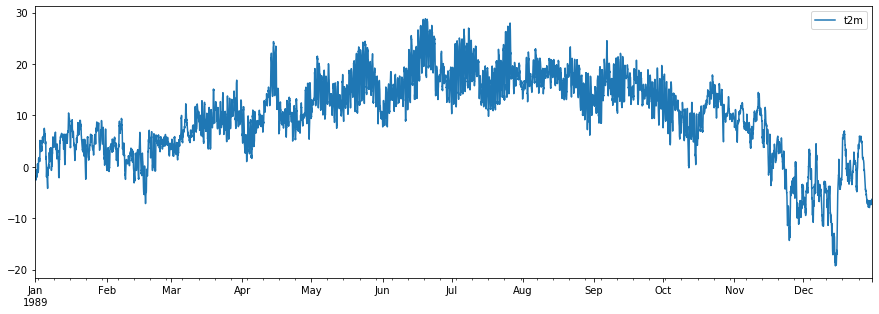

In [26]:
bla = getWeightedData(weatherFile,'t2m',save=False,isTemperature=True)
bla.loc[datetime.datetime(1989,1,1):datetime.datetime(1989,12,31)].plot(figsize=(15,5))


## Extracting data over lake
### Putting lake in database

In [ ]:
#For now this doesn't work on the server but we did it locally and uploaded the vansjo shapefile
#with Connection('localhost') as c:
#    c.local('''ogr2ogr -sql "SELECT * FROM Innsjo_Innsjo WHERE vatnLnr='291'" vansjø.shp /home/jovyan/watexr/Norwegian_lakes/Innsjo_Innsjo.shp''',replace_env=False)
    
basin.connection.put('/home/jovyan/watexr/Norwegian_lakes/vansjø.tar')
basin.connection.run('tar -xf vansjø.tar')
basin.connection.run('rm vansjø.tar')
basin.connection.run('echo "drop table if exists metno.lake;" | psql -d geonorway')
basin.connection.run('shp2pgsql -s 32633:3035 vansjø metno.lake | psql -d geonorway')

### Intersecting lake with gridded data

In [ ]:
# Intersecting grid with basin and getting area of the intersection
sql = '''
DROP TABLE IF EXISTS test_dump;
CREATE TABLE test_dump AS
SELECT (ST_Dump(boundary)).path[1] as sid, (ST_Dump(boundary)).geom as geom
FROM metno.dataBoundaries;

CREATE INDEX dump_idx ON test_dump USING GIST(geom);

DROP TABLE IF EXISTS subdivided_geoms;
CREATE TABLE subdivided_geoms AS
SELECT ST_Subdivide(ST_Force2D(geom),32) AS geom
FROM metno.lake
WHERE gid = 1;

CREATE INDEX subdivided_idx ON test_dump USING GIST(geom);

DROP TABLE IF EXISTS metno.areas;
CREATE TABLE metno.areas AS
WITH biglim AS (
    SELECT a.sid,ST_Area(ST_Intersection(b.geom, a.geom)) AS area FROM  test_dump AS a, subdivided_geoms AS b
    WHERE ST_Intersects(a.geom,b.geom)
) 
SELECT sid,SUM(area) as area FROM biglim
GROUP BY sid;

GRANT SELECT ON ALL TABLES IN SCHEMA metno TO jovyan;
'''.format(station)

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geonorway -f sql.sql')
basin.connection.run('rm sql.sql')

areas = query('SELECT * from metno.areas;')

In [ ]:
idx = [i[0] for i in areas] #weights.idx.values
weight = [i[1] for i in areas] #weights.area.values
#Getting the in a 2d array
weightArray = np.zeros((nc_shape[1:]))
arrayIdx = np.unravel_index(idx,nc_shape[2:0:-1])
for i,j,k in zip(arrayIdx[1],arrayIdx[0],weight):
    weightArray[i][j] = k;

plt.imshow(weightArray)

In [ ]:
# Getting area-weighted data
def getWeightedData(filename,variable,save=True,isTemperature=False):
    nc_data = xr.open_dataset(filename,chunks={'time':1000})
    time = nc_data.time.values
    total_weight = sum(weight)
    data = np.sum(np.sum((nc_data.variables[variable] * weightArray)/total_weight,axis=1),axis=1)
    if isTemperature:
        data-=272.15
    nc_data.close()
    if save:
        data_df = pd.DataFrame({variable:data},index=time)
        data_df.to_pickle('./{}.pickle'.format(variable))
        data_df.to_csv('./{}.csv'.format(variable))
    return data_df

temperature_lake_df = getWeightedData(os.path.abspath('./{}_TG.nc'.format(station)),'TG',isTemperature=True)
temperature_lake_df.plot(figsize=(20,5))
fig=plt.gcf()
fig.savefig('temperature_lake.png')

rain_lake_df = getWeightedData(os.path.abspath('./{}_RR.nc'.format(station)),'RR')
rain_lake_df.plot(figsize=(20,5))
fig=plt.gcf()
fig.savefig('rain_lake.png')

rain_lake_df.to_csv("{}_rain_lake.csv".format(station))
temperature_lake_df.to_csv("{}_temperature_lake.csv".format(station))

In [ ]:
basin.delete('instanceInfo')
fimex.delete('instanceInfo')

## Comparing lake and basin data

In [ ]:
rain_lake_df.columns = {'RR_lake'}
temperature_lake_df.columns = {'TG_lake'}

rain = pd.concat([rain_df, rain_lake_df])
rain.resample('m').sum().plot(figsize=(20,5),marker='+',linestyle='None')#,linestyle='None'

fig=plt.gcf()
fig.savefig('rain_lake_basin.png')

In [ ]:
temperature = pd.concat([temperature_df, temperature_lake_df])
temperature.resample('Y').mean().plot(figsize=(20,5),marker='+')#,linestyle='None'

fig=plt.gcf()
fig.savefig('temperature_lake_basin.png')

In [ ]:
display(rain.mean())